In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file
data = pd.read_csv('/kaggle/input/features-238/audio_features_238.csv')

# Ensure the file exists and is accessible
if not data.empty:
    print("Data loaded successfully.")
else:
    print("Failed to load data.")


Data loaded successfully.


In [13]:
# Assuming 'labels' is the column for emotion labels
X = data.drop('labels', axis=1)  # Features
y = data['labels']  # Labels

# Convert labels to categorical if they are not already
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


453/453 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2335 - loss: 2.0177 - val_accuracy: 0.4752 - val_loss: 1.3844
Epoch 2/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3871 - loss: 1.5124 - val_accuracy: 0.5279 - val_loss: 1.2385
Epoch 3/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4449 - loss: 1.3812 - val_accuracy: 0.5538 - val_loss: 1.1832
Epoch 4/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4909 - loss: 1.2994 - val_accuracy: 0.5726 - val_loss: 1.1249
Epoch 5/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5154 - loss: 1.2484 - val_accuracy: 0.5792 - val_loss: 1.0930
Epoch 6/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5295 - loss: 1.1999 - val_accuracy: 0.5856 - val_loss: 1.0712
Epoch 7/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5525 - loss: 1.1559 - val_accuracy: 0.5977 - val_loss: 1.0560
Epoch 8/200
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5546 - loss: 1.1476 - val_accuracy: 0.60

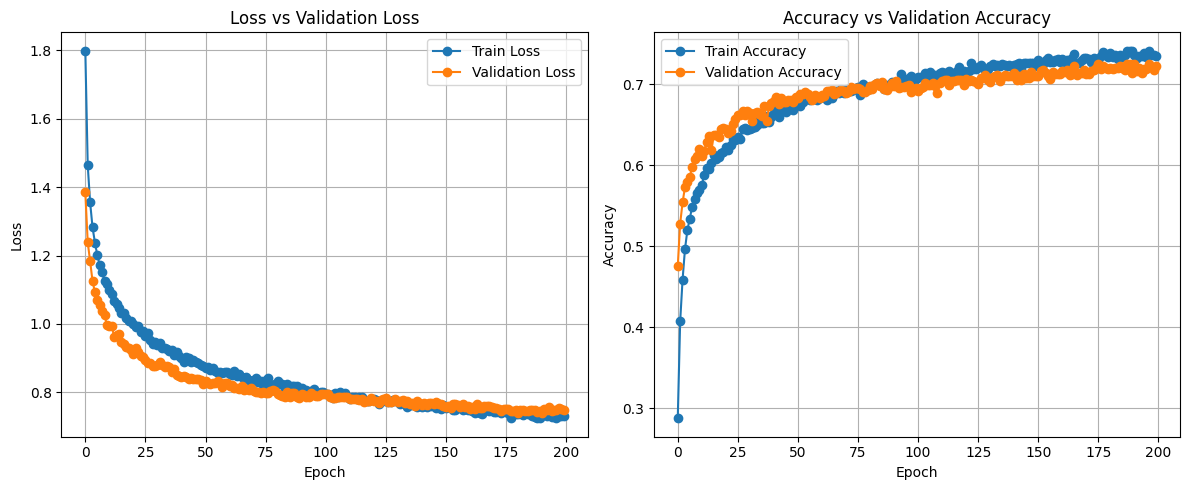

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build the improved MLP model
model = Sequential([
    Dense(64, input_shape=(X.shape[1],) , activation = 'relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(48 , activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(32, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(6, activation='softmax')  # Output for 6 emotion classes
])

# Compile with a conservative learning rate
optimizer = Adam(learning_rate=0.0007)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Compile the model with a slightly lower initial learning rate
optimizer = Adam(learning_rate=0.001)  # You can lower this further to 0.0005 if needed
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Plot Loss vs Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7166 - loss: 0.7404
Test accuracy: 0.72
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Adjusted Rand Index (ARI): 0.4574


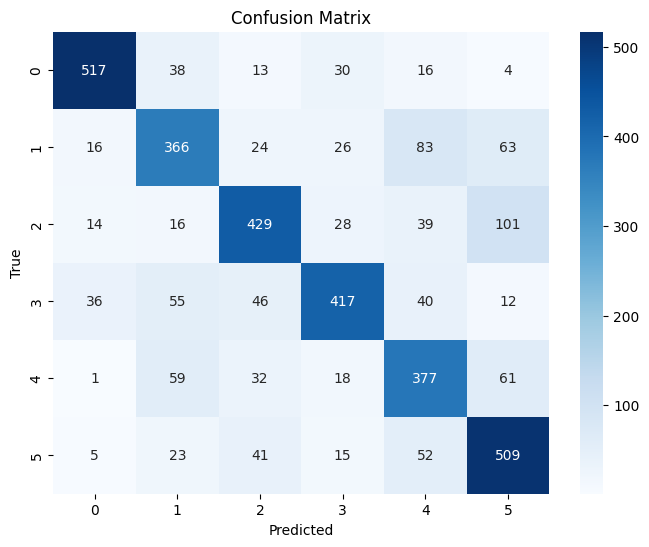

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

from sklearn.metrics import adjusted_rand_score

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_test, y_pred_class)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the training and test CSV files
train_data = pd.read_csv('/kaggle/input/features-238/audio_features_238.csv')
test_data = pd.read_csv('/kaggle/input/features-238/audio_features_238_test.csv')

# Ensure the files exist and are accessible
if not train_data.empty and not test_data.empty:
    print("Data loaded successfully.")
else:
    print("Failed to load data.")

# Assuming 'labels' is the column for emotion labels in the training data
X_train = train_data.drop('labels', axis=1)  # Features
y_train = train_data['labels']  # Labels

# Convert labels to categorical if they are not already
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Split data into training and testing sets (not needed here since we have separate test data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Prepare test data for scaling
X_test = test_data.drop('labels', axis=1)  # Features
X_test = scaler.transform(X_test)  # Use the same scaler for test data

# # Build the model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(6, activation='softmax')  # Output layer with softmax for multi-class classification
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=30, batch_size=32)

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Convert predicted classes back to labels
predicted_emotions_labels = le.inverse_transform(y_pred_class)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'ID': test_data['labels'],  # Assuming 'labels' in test_data are IDs
    'TARGET': predicted_emotions_labels
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("Submission CSV created successfully.")


Data loaded successfully.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4155 - loss: 1.4230
Epoch 2/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6164 - loss: 0.9733
Epoch 3/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6536 - loss: 0.8911
Epoch 4/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6753 - loss: 0.8281
Epoch 5/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6960 - loss: 0.7781
Epoch 6/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7238 - loss: 0.7280
Epoch 7/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7288 - loss: 0.7076
Epoch 8/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.6734
Epoch 9/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7556 - loss: 0.6491
Epoch 10/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7688 - loss: 0.6196
Epoch 11/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7797 - loss: 0.5954
Epoch 12/30
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy